In [71]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import shap
from scipy.optimize import minimize_scalar
from sklearn.model_selection import RepeatedStratifiedKFold, train_test_split
from xgboost import XGBClassifier, XGBRegressor

import fraud_detection as fd
from fraud_detection import data_loader, metrics

datapath = "../data/transformed_label_and_damage.parquet"

In [55]:
shap.initjs()

In [73]:
seed = 42
np.random.seed(seed)

In [74]:
X, targets = data_loader.load_data(datapath, drop_features=data_loader.useless_features)
X = X.to_pandas()
targets = targets.to_pandas()

X_train, X_test, y_train, y_test = train_test_split( X, targets, test_size=0.2, random_state=seed, stratify=targets["label"])

In [75]:
clf = XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    random_state=seed,
    objective="binary:logistic",
)
clf.fit(X_train, y_train["label"])

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [76]:
explainer = shap.TreeExplainer(clf)
shap_values = explainer(X_test)

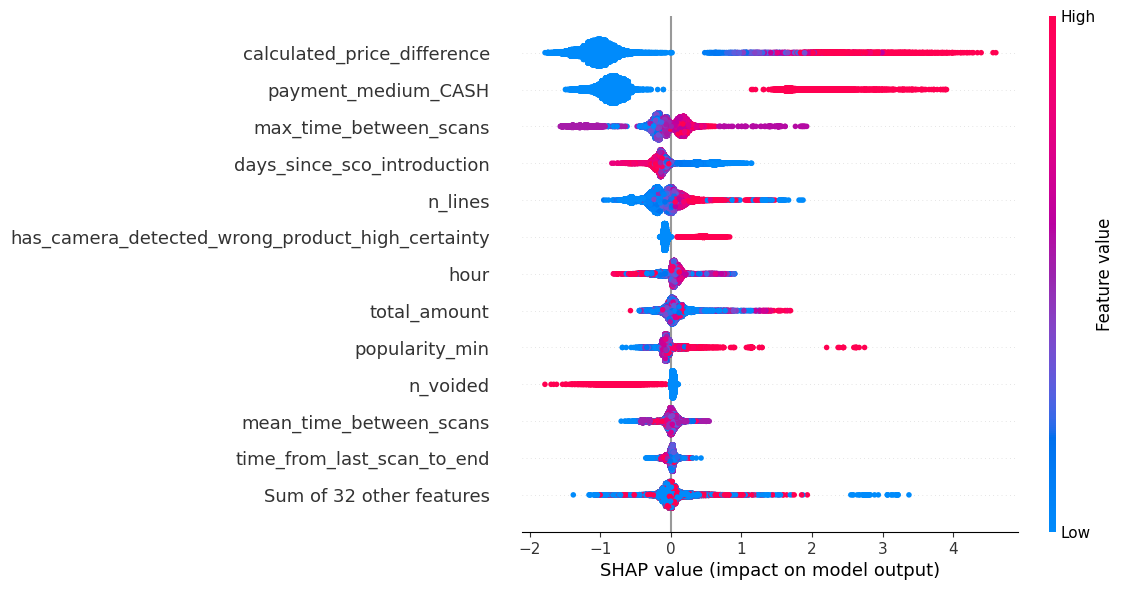

In [77]:
shap.plots.beeswarm(shap_values, max_display=13)

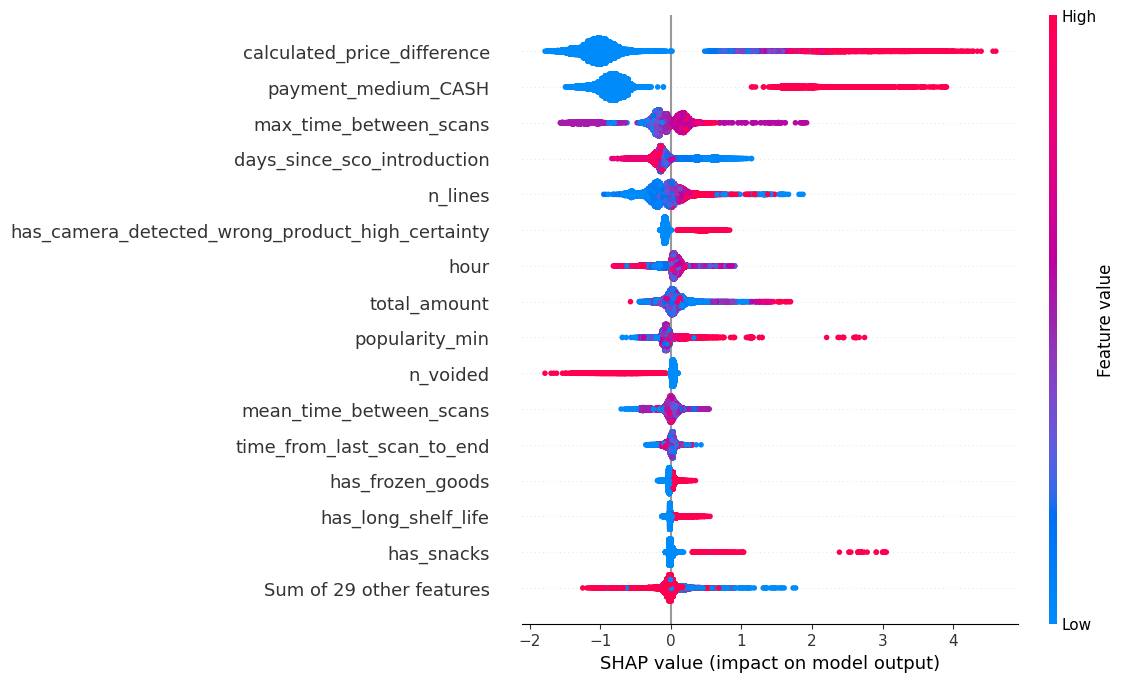

In [78]:
# summarize the effects of all the features
shap.plots.beeswarm(shap_values, max_display=16)

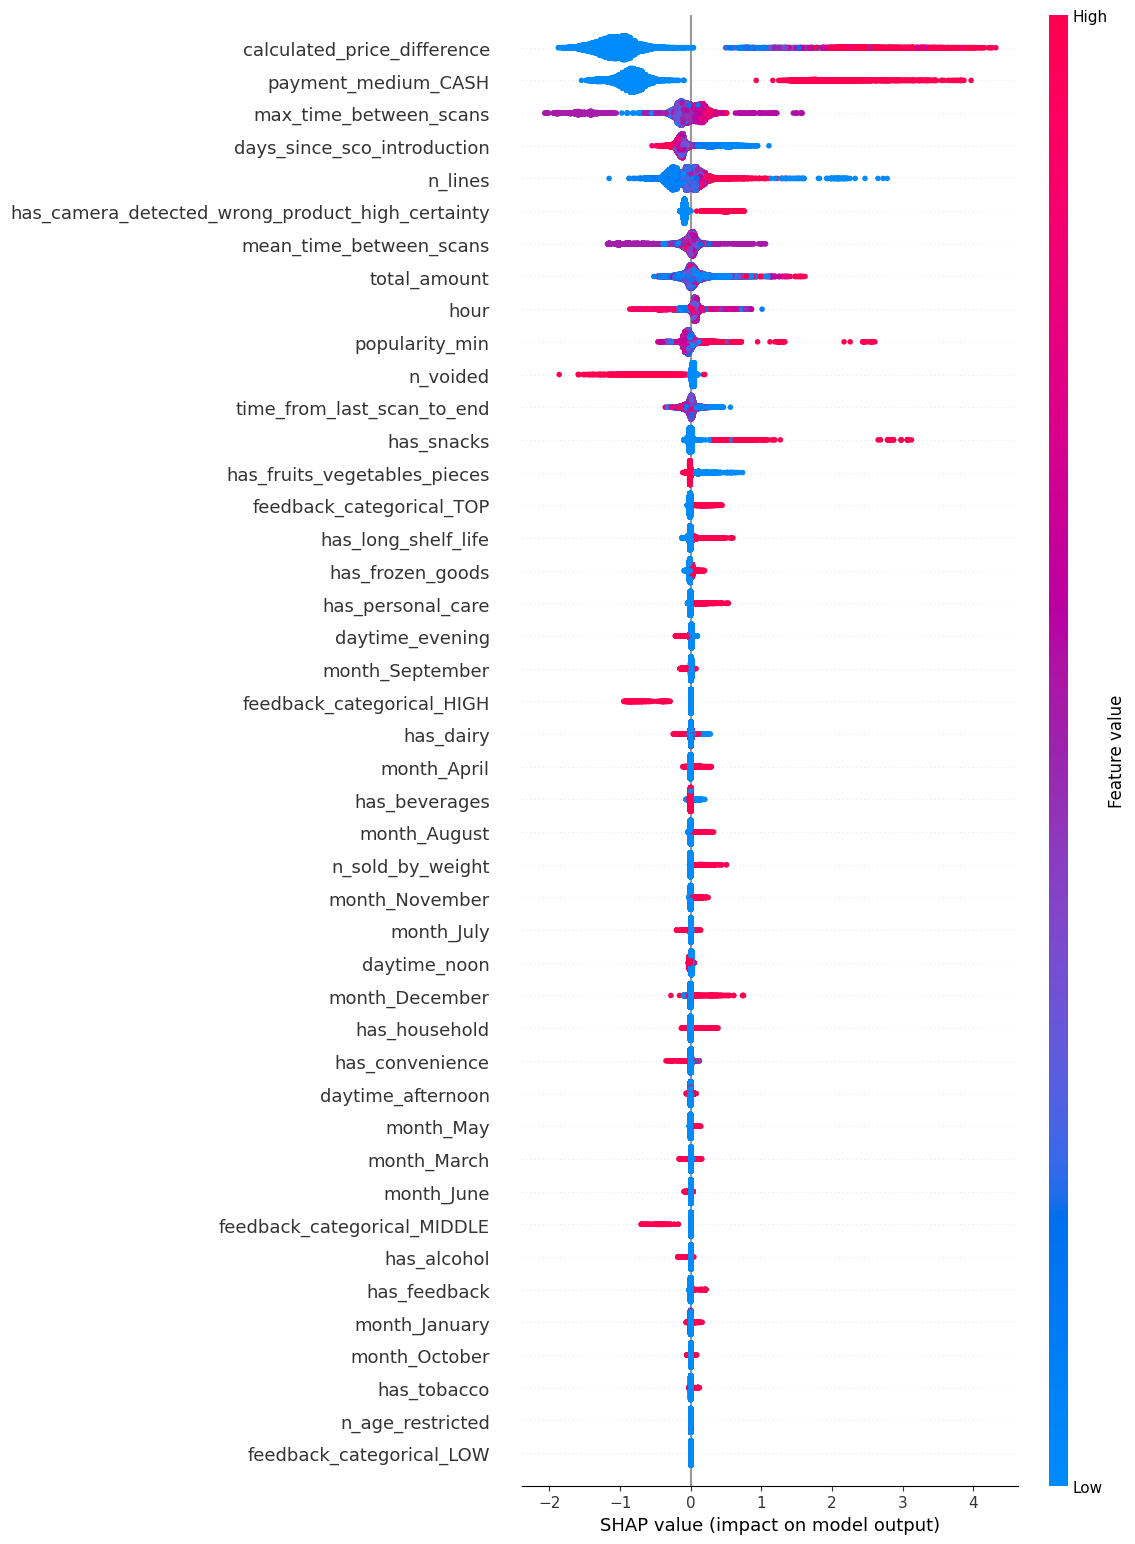

In [70]:
shap.plots.beeswarm(shap_values, max_display=44)

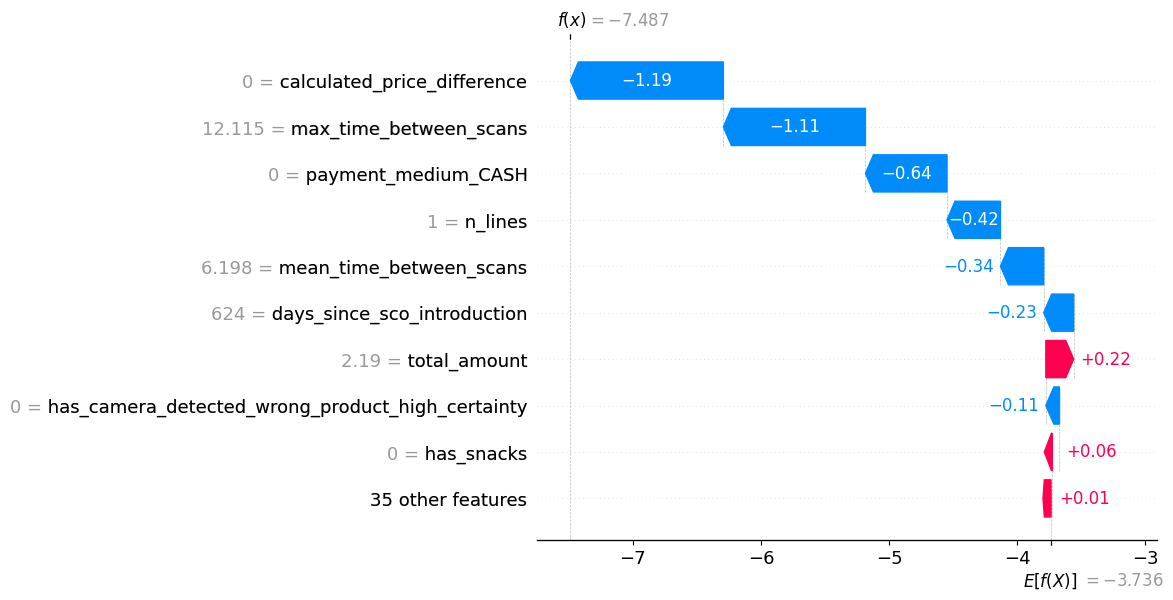

In [111]:
sample_ind = np.random.randint(0, len(X_test), 1)[0]
shap.plots.waterfall(shap_values[sample_ind], max_display=10)